# Data Exploration



In [2]:
import sys 
import os
sys.path.append(os.getcwd()+'/../')

# other
import numpy as np
import glob
import pandas as pd
import ntpath

#keras
from keras.preprocessing import image

# plotting
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

# debuggin
from IPython.core.debugger import Tracer

#stats
import scipy.stats as stats

import bqplot.pyplot as bqplt

Using TensorFlow backend.


# Data File

In [10]:
user_profile = pd.read_csv('../data_user_view_buy/user_profile.csv',sep='\t',header=None)


In [11]:
user_profile.columns = ['user_id','buy_spu','buy_sn','buy_ct3','view_spu','view_sn','view_ct3','time_interval','view_cnt','view_seconds']

In [11]:
string =str(user_profile.buy_spu.as_matrix()[3002])
print(string)
print(string[0:7]+'-'+string[7::])
#print(str(user_profile.buy_spu.as_matrix()[0])[7::])

293936355866378295
2939363-55866378295


In [12]:
user_profile.head(10)

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds
0,3125745546,3454147345092617,10020201,334,100281596405534762,10029251,334,311066,3,50
1,3125745546,3454147345092617,10020201,334,104785174046949392,10014206,334,499624,1,7
2,3125745546,3454147345092617,10020201,334,10491053651988480,10010280,334,409509,2,9
3,3125745546,3454147345092617,10020201,334,20342683550576642,10015063,334,313623,1,2
4,3125745546,3454147345092617,10020201,334,224975005672079387,10020201,334,451607,4,12
5,3125745546,3454147345092617,10020201,334,232293356547952640,10015864,334,228407,1,2
6,3125745546,3454147345092617,10020201,334,243833829111693330,10020201,334,499375,1,10
7,3125745546,3454147345092617,10020201,334,245804153948667933,10020201,334,499347,1,2
8,3125745546,3454147345092617,10020201,334,25127771918368778,10014206,334,499525,1,5
9,3125745546,3454147345092617,10020201,334,299284399610007558,10024895,334,273848,1,4


In [14]:
print('n rows: {0}').format(len(user_profile))

n rows: 6538474


# Plotting Functions

In [20]:
def plot_trajectory_scatter(user_profile,scatter_color_col=None,samplesize=50,size=10,savedir=None):
    plt.figure(figsize=(12,1*samplesize/10))

    for ui,user_id in enumerate(np.random.choice(user_profile.user_id.unique(),samplesize)):
        trajectory = user_profile.loc[user_profile.user_id==user_id,]

        time = 0-trajectory.time_interval.as_matrix()/60.0/60.0/24.0
        
        # add image or not
        if scatter_color_col is not None:
            c = trajectory[scatter_color_col].as_matrix()
        else:
            c = np.ones(len(trajectory))
        
        plt.scatter(time,np.ones(len(time))*ui,s=size,c=c,edgecolors="none",cmap="jet")
        plt.axvline(x=0,linewidth=1)
        sns.despine()
        plt.title('example user trajectories')
        plt.xlabel('days to purchase')
        if savedir is not None:
            plt.savefig(savedir,dpi=100)

# Descriptions of Data

In [13]:
user_profile.describe()

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds
count,6.538474e+06,6.538474e+06,6.538474e+06,6538474.0,6.538474e+06,6.538474e+06,6538474.0,6.538474e+06,6.538474e+06,6.538474e+06
mean,2.157486e+09,7.705014e+17,1.001342e+07,334.0,7.804850e+17,1.001284e+07,334.0,1.695374e+05,2.124666e+00,2.282485e+01
std,1.235368e+09,1.776139e+18,8.024860e+03,0.0,1.785675e+18,8.012593e+03,0.0,1.727738e+05,3.494220e+00,5.179874e+01
min,4.079800e+04,3.578723e+14,1.000001e+07,334.0,3.578723e+14,1.000001e+07,334.0,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.087342e+09,8.536339e+16,1.000595e+07,334.0,8.620783e+16,1.000571e+07,334.0,1.368525e+04,1.000000e+00,4.000000e+00
50%,2.161190e+09,2.500263e+17,1.001327e+07,334.0,2.511522e+17,1.001232e+07,334.0,9.995600e+04,1.000000e+00,8.000000e+00
75%,3.224951e+09,4.403034e+17,1.002064e+07,334.0,4.408663e+17,1.002042e+07,334.0,2.967050e+05,2.000000e+00,2.100000e+01
max,4.294950e+09,9.187062e+18,1.002953e+07,334.0,9.187062e+18,1.002953e+07,334.0,6.047920e+05,9.590000e+02,6.369000e+03


In [14]:
print('unique users:{0}').format(len(user_profile.user_id.unique()))

print('unique items viewed:{0}').format(len(user_profile.view_spu.unique()))
print('unique items bought:{0}').format(len(user_profile.buy_spu.unique()))

print('unique categories viewed:{0}').format(len(user_profile.view_ct3.unique()))
print('unique categories bought:{0}').format(len(user_profile.buy_ct3.unique()))
print('unique brands viewed:{0}').format(len(user_profile.view_sn.unique()))
print('unique brands bought:{0}').format(len(user_profile.buy_sn.unique()))

unique users:99999
unique items viewed:96999
unique items bought:32342
unique categories viewed:1
unique categories bought:1
unique brands viewed:727
unique brands bought:557


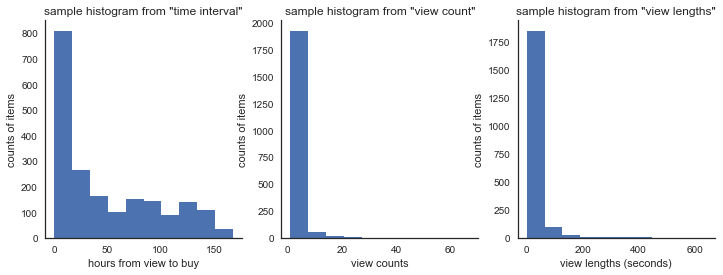

In [15]:
samplesize = 2000
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(np.random.choice(user_profile.time_interval.as_matrix()/60.0/60.0,samplesize))
sns.despine()
plt.title('sample histogram from "time interval"')
plt.xlabel('hours from view to buy')
plt.ylabel('counts of items')

plt.subplot(1,3,2)
plt.hist(np.random.choice(user_profile.view_cnt.as_matrix(),samplesize))
sns.despine()
plt.title('sample histogram from "view count"')
plt.xlabel('view counts')
plt.ylabel('counts of items')

plt.subplot(1,3,3)
plt.hist(np.random.choice(user_profile.view_seconds.as_matrix(),samplesize))
sns.despine()
plt.title('sample histogram from "view lengths"')
plt.xlabel('view lengths (seconds)')
plt.ylabel('counts of items')

- there are many items that are viewed more than a day before buying
- most items are viewed less than 10 times and for less than a couple minutes (though need to zoom in) 


In [16]:
print('longest time interval')
print(user_profile.time_interval.min())

print('longest time interval')
print(user_profile.time_interval.max()/60.0/60.0/24)


longest time interval
0
longest time interval
6.99990740741


- longest span from viewing to buying is 6 days 

###  Average Time for Items Viewed before Being Bought

In [17]:
mean_time_interval = np.array([])
samplesize =1000
for user_id in np.random.choice(user_profile.user_id.unique(),samplesize):
    mean_time_interval = np.append(mean_time_interval, user_profile.loc[user_profile.user_id==user_id,'time_interval'].mean())
    

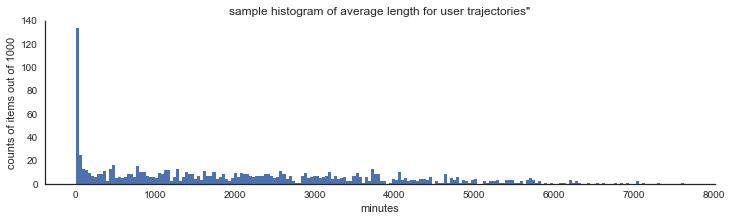

In [18]:
plt.figure(figsize=(12,3))
plt.hist(mean_time_interval/60.0,bins=200)
sns.despine()
plt.title('sample histogram of average length for user trajectories"')
plt.xlabel('minutes')
plt.ylabel('counts of items out of '+str(samplesize))


- 5% look like they have relatively short sessions (maybe within one sitting)

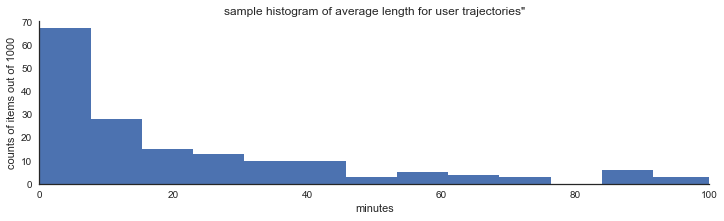

In [19]:
plt.figure(figsize=(12,3))
plt.hist(mean_time_interval/60.0,bins=1000)
plt.xlim(0,100)
sns.despine()
plt.title('sample histogram of average length for user trajectories"')
plt.xlabel('minutes')
plt.ylabel('counts of items out of '+str(samplesize))


- zooming in to look at the shortest sessions. 
- about 7% have sessions <10 minutes

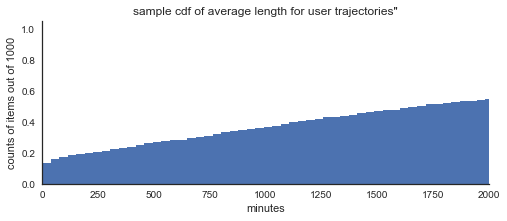

In [20]:
plt.figure(figsize=(8,3))
plt.hist(mean_time_interval/60.0,bins=200,cumulative=True,normed=True)
plt.xlim(0,2000)
sns.despine()
plt.title('sample cdf of average length for user trajectories"')
plt.xlabel('minutes')
plt.ylabel('counts of items out of '+str(samplesize))


- 20% has sessions less <100 minutes

### Example Trajectories

In [21]:
user_id = 1606682799
trajectory = user_profile.loc[user_profile.user_id==user_id,]
trajectory= trajectory.sort_values(by='time_interval',ascending=False)
trajectory

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds
941700,1606682799,31038742178611202,10021072,334,1483874171215895,10011806,334,1722,1,8
3122676,1606682799,31038742178611202,10021072,334,244396773139058688,10023064,334,1612,1,7
3122680,1606682799,31038742178611202,10021072,334,98592737342341127,10020640,334,1599,1,5
941703,1606682799,31038742178611202,10021072,334,460569523062440054,10013861,334,1568,2,34
941701,1606682799,31038742178611202,10021072,334,292247513449336850,10013861,334,1533,1,3
941699,1606682799,31038742178611202,10021072,334,102533392945205253,10020640,334,1507,1,11
5300612,1606682799,31038742178611202,10021072,334,457754773298602023,10013861,334,1428,1,8
3122678,1606682799,31038742178611202,10021072,334,295625232722276353,10021072,334,1393,3,82
941702,1606682799,31038742178611202,10021072,334,323209779688951808,10021072,334,1346,1,1
3122677,1606682799,31038742178611202,10021072,334,292810475522134093,10028876,334,415,1,6


- this is an example trajectory of  someone who browsed a few items and then bought item 31.. within the same session. 

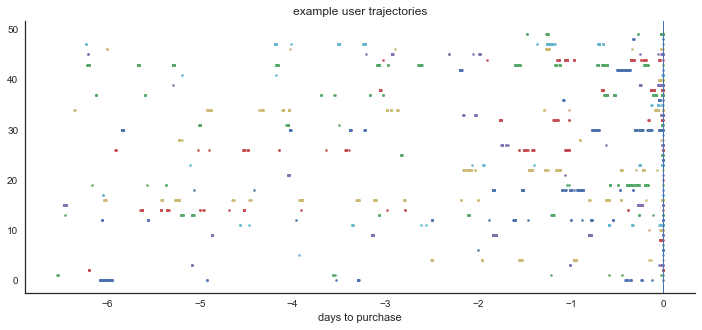

In [115]:
plot_trajectory_scatter(user_profile)

- here are 50 random subjects and when they view items (could make into an interactive plot)

### What's the distribution of items that are bought? Are there some items that are much more popular than others? 

In [20]:
samplesize =1000
number_of_times_item_bought = np.empty(samplesize)
number_of_times_item_viewed = np.empty(samplesize)
for ii,item_id in enumerate(np.random.choice(user_profile.view_spu.unique(),samplesize)):
    number_of_times_item_bought[ii] = len(user_profile.loc[user_profile.buy_spu==item_id,'user_id'].unique()) # assume the same user would not buy the same product 
    number_of_times_item_viewed[ii] = len(user_profile.loc[user_profile.view_spu==item_id]) # same user can view the same image more than once for this count
    
    

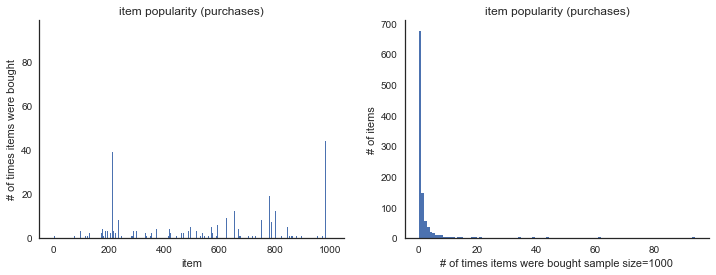

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(np.arange(len(number_of_times_item_bought)),number_of_times_item_bought)
sns.despine()
plt.title('item popularity (purchases)')
plt.xlabel('item')
plt.ylabel('# of times items were bought')

plt.subplot(1,2,2)
plt.hist(number_of_times_item_bought,bins=100)
sns.despine()
plt.title('item popularity (purchases)')
plt.xlabel('# of times items were bought sample size='+str(samplesize))
plt.ylabel('# of items')

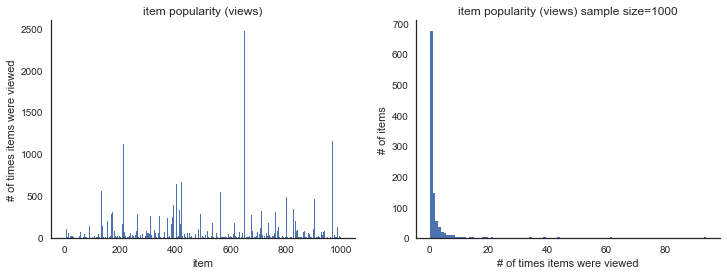

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(np.arange(len(number_of_times_item_viewed)),number_of_times_item_viewed)
sns.despine()
plt.title('item popularity (views)')
plt.xlabel('item')
plt.ylabel('# of times items were viewed')

plt.subplot(1,2,2)
plt.hist(number_of_times_item_bought,bins=100)
sns.despine()
plt.title('item popularity (views) sample size='+str(samplesize))
plt.xlabel('# of times items were viewed')
plt.ylabel('# of items')

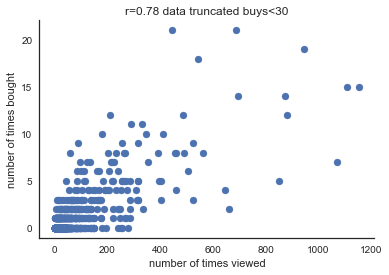

In [37]:
plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
thresh =30
include = number_of_times_item_bought<thresh
plt.scatter(number_of_times_item_viewed[include],number_of_times_item_bought[include],)
(r,p) = stats.pearsonr(number_of_times_item_viewed[include],number_of_times_item_bought[include])
sns.despine()
plt.xlabel('number of times viewed')
plt.ylabel('number of times bought')
plt.title('r='+str(np.round(r,2))+' data truncated buys<'+str(thresh))

### Items bought and viewed per user? 

In [9]:
samplesize =1000
items_bought_per_user = np.empty(samplesize)
items_viewed_per_user = np.empty(samplesize)
for ui,user_id in enumerate(np.random.choice(user_profile.user_id.unique(),samplesize)):
    items_bought_per_user[ui] = len(user_profile.loc[user_profile.user_id==user_id,'buy_spu'].unique())
    items_viewed_per_user[ui] = len(user_profile.loc[user_profile.user_id==user_id,'view_spu'].unique())
    

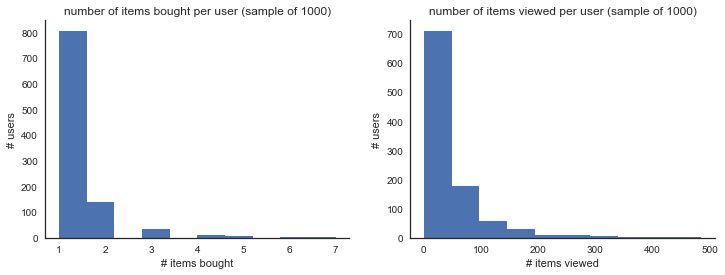

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(items_bought_per_user)
sns.despine()
plt.title('number of items bought per user (sample of 1000)')
plt.xlabel('# items bought')
plt.ylabel('# users')

plt.subplot(1,2,2)
plt.hist(items_viewed_per_user)
sns.despine()
plt.title('number of items viewed per user (sample of 1000)')
plt.xlabel('# items viewed')
plt.ylabel('# users')

### How many times did the user buy an item he/she already looked at? 

# Image URLs

### How many of the SPUs in our dataset (smaller) have urls in our url.csv?

In [65]:
urls = pd.read_csv('../../deep-learning-models-master/img/eval_img_url.csv',header=None)
urls.columns = ['spu','url']
print(len(urls))
urls.head(10)


33662


,spu,url
0,100000000317431808,http://a.vpimg2.com/upload/merchandise/pdc/808...
1,100000001066491904,http://a.vpimg2.com/upload/merchandise/pdc/904...
2,100000005622976512,http://a.vpimg2.com/upload/merchandise/pdc/512...
3,100000009136676865,http://a.vpimg2.com/upload/merchandise/pdcvis/...
4,100000009494401198,http://a.vpimg2.com/upload/merchandise/pdcvis/...
5,100000019080622267,http://a.vpimg2.com/upload/merchandise/pdcvis/...
6,100000020837699950,http://a.vpimg2.com/upload/merchandise/pdcvis/...
7,100000021928063132,http://a.vpimg2.com/upload/merchandise/pdcvis/...
8,100000030105853978,http://a.vpimg2.com/upload/merchandise/pdcvis/...
9,100000030491275422,http://a.vpimg2.com/upload/merchandise/pdcvis/...


In [77]:
urls[['spu','url']].groupby(['spu']).agg(['count']).head()

,url
,count
spu,
357870273655002,2
357870995513345,1
357872333107204,1
357875526676843,1
357875526680651,1


- items with more than one url?

In [73]:
urls.loc[urls.spu==357870273655002,'url'].as_matrix()

array([ 'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/08/19/84/4686fee8-e13c-4f2b-afe5-47fd95d81d06.jpg',
       'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/10/12/58/81934e84-b886-40a1-b311-dde38077b19a.jpg'], dtype=object)

In [76]:
urls.loc[urls.spu==357889732772303,'url'].as_matrix()

array([ 'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/10/28/97/77e274ae-96d5-42ec-a8f7-a0d3e9612bd4.jpg',
       'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/10/19/171/823f738b-0f0c-49f6-851c-a1c60a4fdd03.jpg',
       'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/12/05/37/cdd764f9-48ae-4c57-a715-f9b6763cfc0d.jpg',
       'http://a.vpimg2.com/upload/merchandise/pdcvis/2016/11/09/116/d58df0b7-27a2-48ac-b657-1e85f4e863e3.jpg'], dtype=object)

- these are the same item, just different images. 

In [82]:
#urls.loc[urls.spu==1016200950427238422,'url']


In [84]:
tmp_urls = urls.loc[urls.spu==1016200950427238422,'url'].as_matrix()
tmp_urls

array([ 'http://a.vpimg2.com/upload/merchandise/pdc/422/238/1016200950427238422/0/2014138502-1554-5.jpg',
       'http://a.vpimg2.com/upload/merchandise/pdc/413/238/1016200950427238413/0/2014138517-9834-5.jpg'], dtype=object)

In [83]:
from urllib import urlretrieve
import time



In [88]:
# scrape images   
for i,tmp_url in enumerate(tmp_urls):
    urlretrieve(tmp_url, '../data_img_tmp/{}.jpg'.format(i))
    #time.sleep(3)

two images from url with same spu (ugh)


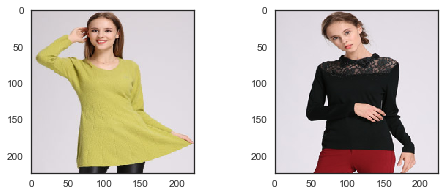

In [96]:
# plot them. 
print('two images from url with same spu (ugh)')
plt.figure(figsize=(8,3))
for i,tmp_url in enumerate(tmp_urls):
    img_path= '../data_img_tmp/{}.jpg'.format(i)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.subplot(1,len(tmp_urls),i+1)
    plt.imshow(img)
    plt.grid(b=False)

- **These are different thought!!**

In [78]:
urls.spu[0]

100000000317431808

In [54]:
urls.url[0]

'http://a.vpimg2.com/upload/merchandise/pdc/808/431/100000000317431808/0/2283211-5.jpg'

- the url contains the spu, but I'm not sure what the other numbers are. The goods_num? The category etc? 

In [51]:
view_spus = user_profile.view_spu.unique()
contained = 0
spus_with_url = list(urls.spu.as_matrix())
for view_spu in view_spus: 
    if view_spu in spus_with_url:
        contained+=1
print(contained/np.float(len(view_spus)))

0.090299899999


In [53]:
buy_spus = user_profile.buy_spu.unique()
contained = 0
spus_with_url = list(urls.spu.as_matrix())
for buy_spu in buy_spus: 
    if buy_spu in spus_with_url:
        contained+=1
print(contained/np.float(len(buy_spus)))

0.0732793271906


- we only have the url for 7% of the bought items and 9% of the viewed items

In [64]:
buy_spu in spus_with_url

False

In [58]:
len(urls.spu.unique())
len(user_profile.view_spu.unique())

96999

# Are the images we have in this new dataset?

- at the moment, I don't know how to find the spu of the images we have. 

# Viewing DataSet with Feature Data in 

In [3]:
spu_fea = pd.read_pickle("../data_nn_features/spu_fea.pkl") #takes forever to load 

In [4]:
spu_fea['view_spu']=spu_fea['spu_id']

In [12]:
spu_fea['view_spu']=spu_fea['spu_id']
user_profile_w_features = user_profile.merge(spu_fea,on='view_spu',how='left')
print('before merge nrow: {0}').format(len(user_profile))
print('after merge nrows:{0}').format(len(user_profile_w_features))

before merge nrow: 6538474
after merge nrows:6538474


In [13]:
print('number of items with features: {0}').format(len(spu_fea))

number of items with features: 58820


In [14]:
spu_fea.head()

,spu_id,features,view_spu
1,100000087145246721,"[0.009, 0.839, 0.439, 1.673, 0.226, 0.055, 0.1...",100000087145246721
2,100000090992795708,"[0.0, 1.878, 0.353, 1.505, 0.047, 0.003, 0.0, ...",100000090992795708
4,100281553839460375,"[0.661, 1.84, 0.028, 1.128, 0.172, 1.097, 1.45...",100281553839460375
8,100844539282133007,"[0.444, 0.428, 0.0, 0.342, 0.314, 0.015, 0.529...",100844539282133007
9,101688901872443404,"[0.058, 2.361, 0.0, 1.037, 0.013, 1.009, 1.543...",101688901872443404


In [15]:
# merge with userdata
spu_fea['view_spu']=spu_fea['spu_id']
user_profile_w_features = user_profile.merge(spu_fea,on='view_spu',how='left')
print('before merge nrow: {0}').format(len(user_profile))
print('after merge nrows:{0}').format(len(user_profile_w_features))

before merge nrow: 6538474
after merge nrows:6538474


In [16]:
user_profile_w_features['has_features']=user_profile_w_features.groupby(['view_spu'])['spu_id'].apply(lambda x: np.isnan(x))

In [130]:
user_profile_w_features.has_features= user_profile_w_features.has_features.astype('int')

In [131]:
user_profile_w_features.head()

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds,spu_id,features,has_features
0,3125745546,3454147345092617,10020201,334,100281596405534762,10029251,334,311066,3,50,1.002816e+17,"[0.0, 0.442, 0.0, 3.436, 0.061, 0.328, 0.262, ...",0
1,3125745546,3454147345092617,10020201,334,104785174046949392,10014206,334,499624,1,7,NaN,NaN,1
2,3125745546,3454147345092617,10020201,334,10491053651988480,10010280,334,409509,2,9,NaN,NaN,1
3,3125745546,3454147345092617,10020201,334,20342683550576642,10015063,334,313623,1,2,NaN,NaN,1
4,3125745546,3454147345092617,10020201,334,224975005672079387,10020201,334,451607,4,12,2.249750e+17,"[0.133, 0.082, 0.776, 0.481, 0.077, 0.256, 0.0...",0


## Plotting Trajectories and Seeing How many features we have


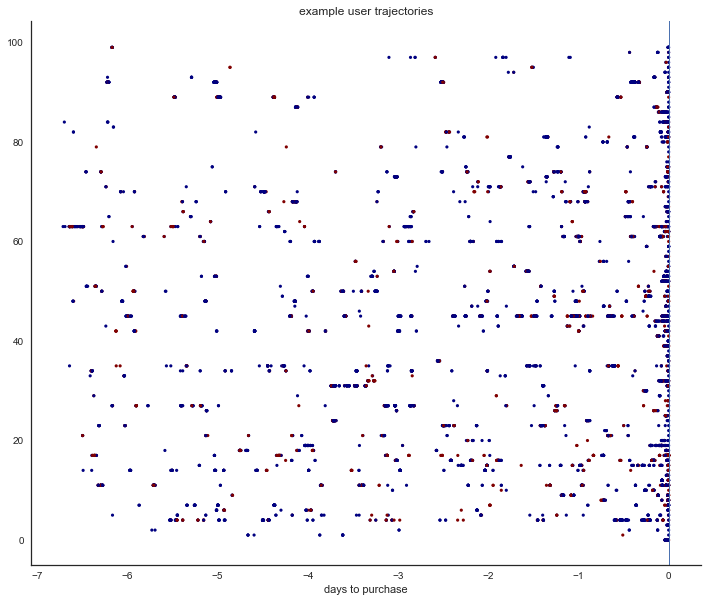

In [154]:
plot_trajectory_scatter(user_profile_w_features,scatter_color_col='has_features',samplesize=100,size=10,savedir='../../test.png')

## What percent of rows have features? 


In [108]:
1-(user_profile_w_features['features'].isnull()).mean()

0.73175897005937474

## What percent of bought items are in the feature list? 


In [116]:
1-user_profile_w_features.groupby(['view_spu'])['spu_id'].apply(lambda x: np.isnan(x)).mean()

0.26824102994062526

In [27]:
buy_spus = user_profile.buy_spu.unique()
contained = 0
spus_with_features = list(spu_fea.spu_id.as_matrix())
for buy_spu in buy_spus: 
    if buy_spu in spus_with_features:
        contained+=1
print(contained/np.float(len(buy_spus)))

0.678931420444


In [28]:
contained

21958

In [29]:
len(buy_spus)

32342

In [30]:
view_spus = user_profile.view_spu.unique()
contained = 0
spus_with_features = list(spu_fea.spu_id.as_matrix())
for view_spu in view_spus: 
    if view_spu in spus_with_features:
        contained+=1
print(contained/np.float(len(view_spus)))

0.606398004103


In [31]:
len(view_spus)


96999

# Evaluation Dataset



In [3]:
user_profile = pd.read_pickle('../data_user_view_buy/user_profile_items_nonnull_features_20_mins_5_views.pkl')

In [4]:
len(user_profile)

544913

In [6]:
print('unique users:{0}').format(len(user_profile.user_id.unique()))

print('unique items viewed:{0}').format(len(user_profile.view_spu.unique()))
print('unique items bought:{0}').format(len(user_profile.buy_spu.unique()))

print('unique categories viewed:{0}').format(len(user_profile.view_ct3.unique()))
print('unique categories bought:{0}').format(len(user_profile.buy_ct3.unique()))
print('unique brands viewed:{0}').format(len(user_profile.view_sn.unique()))
print('unique brands bought:{0}').format(len(user_profile.buy_sn.unique()))

unique users:11903
unique items viewed:45668
unique items bought:3782
unique categories viewed:1
unique categories bought:1
unique brands viewed:547
unique brands bought:354


In [16]:
#user_profile.groupby(['user_id'])['buy_spu'].nunique()

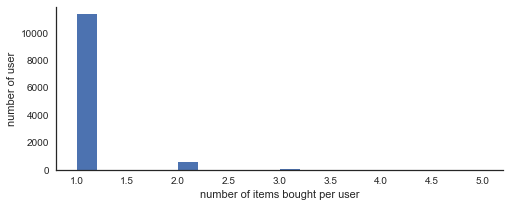

In [10]:
# how many items bought per user in this dataset? 
plt.figure(figsize=(8,3))
plt.hist(user_profile.groupby(['user_id'])['buy_spu'].nunique(),bins=20,normed=False)
sns.despine()
plt.xlabel('number of items bought per user')
plt.ylabel('number of user')

In [15]:
user_profile.loc[user_profile.user_id==4283991208,]

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds,index,spu_id,features,view_spu_count
1717617,4283991208,3172717375315987,10026622,334,103940738865885244,10011540,334,93823,1,3,1291.0,1.039407e+17,"[0.0, 0.525, 0.101, 0.28, 0.0, 0.0, 0.018, 0.2...",294
1717621,4283991208,3172717375315987,10026622,334,13305822896521234,10014206,334,75794,1,4,66061.0,1.330582e+16,"[0.052, 0.05, 0.002, 0.0, 0.021, 0.0, 0.039, 0...",294
1717623,4283991208,3172717375315987,10026622,334,1483775526015157,10026622,334,21742,1,26,10175.0,1.483776e+15,"[0.267, 0.28, 0.003, 1.297, 0.28, 0.013, 0.162...",294
1717624,4283991208,3172717375315987,10026622,334,17527905451290635,10014936,334,94170,5,28,7548.0,1.752791e+16,"[0.175, 3.27, 0.225, 1.059, 0.561, 0.019, 0.03...",294
1717625,4283991208,3172717375315987,10026622,334,225537933784404046,10005711,334,103261,1,5,80000.0,2.255379e+17,"[0.651, 0.679, 0.0, 0.598, 0.215, 0.001, 0.04,...",294
1717627,4283991208,3172717375315987,10026622,334,226945303689633846,10011540,334,93076,2,13,83804.0,2.269453e+17,"[0.078, 0.471, 0.0, 0.562, 0.04, 0.0, 0.169, 0...",294
1717628,4283991208,3172717375315987,10026622,334,23157348732739802,10026622,334,23232,2,23,15309.0,2.315735e+16,"[0.123, 1.018, 0.0, 0.241, 0.037, 0.0, 0.794, ...",294
1717629,4283991208,3172717375315987,10026622,334,23157423020531740,10010458,334,95105,1,6,1458.0,2.315742e+16,"[0.313, 0.473, 0.205, 0.15, 0.36, 0.041, 0.167...",294
1717631,4283991208,3172717375315987,10026622,334,243270852316745762,10011540,334,85515,4,81,2731.0,2.432709e+17,"[0.064, 2.257, 0.057, 0.246, 0.024, 0.0, 0.27,...",294
1717632,4283991208,3172717375315987,10026622,334,247774475044470785,10026622,334,83427,1,3,61120.0,2.477745e+17,"[0.016, 2.397, 0.092, 0.378, 0.223, 0.006, 0.5...",294


limit_output extension: Maximum message size of 10000 exceeded with 25694 characters

- some people have longer viewing trajectories. first item was viewed 28hours ahead of time. 

In [14]:
user_profile.loc[user_profile.user_id==6539296,]

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds,index,spu_id,features,view_spu_count
1909703,6539296,4714500743357079552,10015678,334,230604513463791633,10028297,334,393376,2,38,17816.0,2.306045e+17,"[0.09, 0.061, 0.0, 0.109, 0.486, 0.034, 0.108,...",67
1909704,6539296,4714500743357079552,10015678,334,238204332051542018,10028297,334,393455,1,4,1497.0,2.382043e+17,"[0.048, 0.326, 0.063, 0.302, 0.178, 0.319, 0.8...",67
1909707,6539296,4714500743357079552,10015678,334,292529005121761410,10016791,334,280246,1,5,11737.0,2.925290e+17,"[0.0, 1.925, 0.281, 0.025, 0.476, 0.0, 0.204, ...",67
1909708,6539296,4714500743357079552,10015678,334,296188153247072271,10001351,334,576605,1,20,38219.0,2.961882e+17,"[0.234, 0.398, 0.178, 2.219, 0.321, 0.048, 0.0...",67
1909709,6539296,4714500743357079552,10015678,334,302662074473369605,10015636,334,264693,2,33,58662.0,3.026621e+17,"[0.474, 0.197, 0.0, 0.978, 0.06, 0.0, 0.011, 0...",67
1909710,6539296,4714500743357079552,10015678,334,307165668905115683,10004555,334,430709,1,21,86666.0,3.071657e+17,"[0.173, 0.031, 0.013, 2.349, 0.376, 0.106, 0.1...",67
1909711,6539296,4714500743357079552,10015678,334,307728624054161408,10015636,334,392614,1,11,53553.0,3.077286e+17,"[0.044, 1.257, 0.0, 0.449, 0.333, 0.0, 0.649, ...",67
1909712,6539296,4714500743357079552,10015678,334,321239449850023952,10020640,334,479555,1,5,44680.0,3.212394e+17,"[0.0, 0.0, 0.0, 0.005, 0.263, 0.0, 0.22, 0.174...",67
1909714,6539296,4714500743357079552,10015678,334,438051570214809601,10020640,334,479535,1,5,42373.0,4.380516e+17,"[0.026, 0.954, 0.11, 0.632, 0.117, 0.113, 0.00...",67
1909715,6539296,4714500743357079552,10015678,334,446777294492839942,10020640,334,479581,1,5,770.0,4.467773e+17,"[0.188, 0.451, 0.02, 0.174, 0.106, 0.024, 0.20...",67


limit_output extension: Maximum message size of 10000 exceeded with 25594 characters

- this person bought two items. 

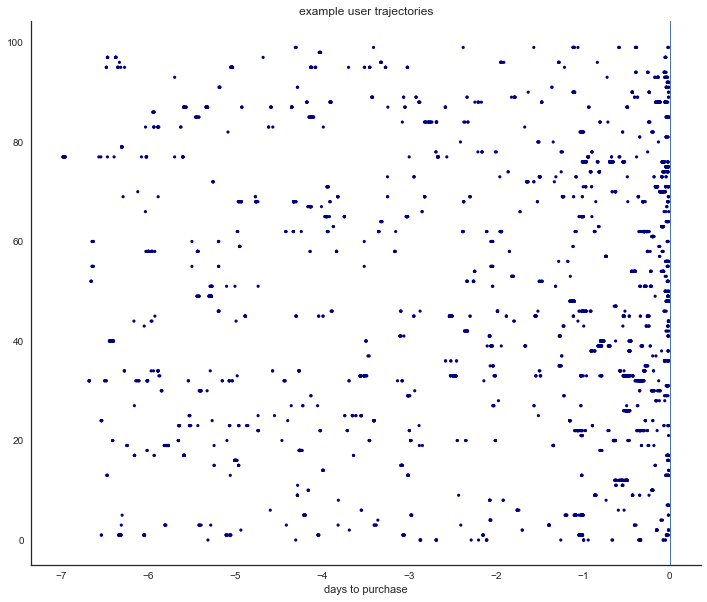

In [21]:
plot_trajectory_scatter(user_profile,samplesize=100,size=10,savedir='../figures/trajectories_evaluation_dataset.png')

- I'd like to make this figure better - easier to tell which rows people are on

# Save Notebook

In [ ]:
%%bash 
jupyter nbconvert --to slides Exploring_Data.ipynb && mv Exploring_Data.slides.html ../notebook_slides/Exploring_Data_v1.slides.html
jupyter nbconvert --to html Exploring_Data.ipynb && mv Exploring_Data.html ../notebook_htmls/Exploring_Data_v1.html
cp Exploring_Data.ipynb ../notebook_versions/Exploring_Data_v1.ipynb

In [38]:
# push to s3 
import sys
import os
sys.path.append(os.getcwd()+'/../')
from src import s3_data_management
s3_data_management.push_results_to_s3('Exploring_Data_v1.html','../notebook_htmls/Exploring_Data_v1.html')
s3_data_management.push_results_to_s3('Exporing_Data_v1.slides.html','../notebook_slides/Exploring_Data_v1.slides.html')


..................